#  Unit 2.4b Using Programs with Data, SQL
> Using Programs with Data is focused on SQL and database actions.  Part B focuses on learning SQL commands, connections, and curses using an Imperative programming style,
- toc: true
- categories: [t3]

# Database Programming is Program with Data
> Each Tri 2 Final Project should be an example of a Program with Data. 

>  Prepare to use SQLite in common Imperative Technique
- Explore [SQLite Connect object](https://www.tutorialspoint.com/python_data_access/python_sqlite_establishing_connection.htm) to establish database connection
- Explore [SQLite Cursor Object](https://www.tutorialspoint.com/python_data_access/python_sqlite_cursor_object.htm) to fetch data from a table within a database


## Schema of Users table in Sqlite.db
> Uses PRAGMA statement to read schema.

Describe Schema, here is resource [Resource](https://www.sqlite.org/index.html)
- What is a database schema?
    - blueprint describing the organization of a databse
    - columns of a database
- What is the purpose of identity Column in SQL database?
    - to differentiate between columns
    - helps you to get data from certain columns
    - you should label columns with specific names
    - easy to access
- What is the purpose of a primary key in SQL database?
    - some specific value that's associated with each individual user
    - ex. user ID
- What are the Data Types in SQL table?
    - integer
    - string
    - text
    - boolean
    - images
    - any data type
    - list
    - dictionary
    - class

In [1]:
import sqlite3

database = 'instance/sqlite.db' # this is location of database

def schema():
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Fetch results of Schema
    results = cursor.execute("PRAGMA table_info('users')").fetchall()

    # Print the results
    for row in results:
        print(row)

    # Close the database connection
    conn.close()
    
schema()


(0, 'id', 'INTEGER', 1, None, 1)
(1, '_name', 'VARCHAR(255)', 1, None, 0)
(2, '_uid', 'VARCHAR(255)', 1, None, 0)
(3, '_password', 'VARCHAR(255)', 1, None, 0)
(4, '_dob', 'DATE', 0, None, 0)


^^ this code cell outputted the different variables (outputted the schema)
- shows data types contained in table, ex. integer, character, etc.
- VARCHAR(255) means that the data type is a string with a character limit of 255

## Reading Users table in Sqlite.db
> Uses SQL SELECT statement to read data

- What is a connection object?  After you google it, what do you think it does?
    - represents a unique session with a data source. In a client/server database system, it may be equivalent to an actual network connection to the server
- Same for cursor object?
    - 
- Look at conn object and cursor object in VSCode debugger.  What attributes are in the object?
- Is "results" an object?  How do you know?

In [4]:
import sqlite3

def read():
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL queries
    cursor = conn.cursor()
    
    # Execute a SELECT statement to retrieve data from a table
    results = cursor.execute('SELECT * FROM users').fetchall()

    # Print the results
    if len(results) == 0: # results has data in it, so it could be an object; results has attributes
        print("Table is empty")
    else:
        for row in results:
            print(row)

    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
read()


(1, 'Thomas Edison', 'toby', 'sha256$zfnsqIPEAKoeZMf2$890504297f31e7a002c6d63fb520e6bf8b9ff5e53ead6fa095520d0da223fa2a', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$DhTSX1uSdNW12e66$5c56bd8cfac971f6208f4169fafc794b59eafa28eed29e858d2280bf67f4fb36', '2023-03-15')
(3, 'Alexander Graham Bell', 'lex', 'sha256$WYXdAAUsb9SqyRlQ$4968219d252cc37477dd467038cce4a1a26c22aad9d9d7374f75557b23e83495', '2023-03-15')
(4, 'Eli Whitney', 'whit', 'sha256$Hn4HMsO2553pYQLp$6085a296175563b2363eb4293a208698ca31e760a5e8a74394a35510817c15a0', '2023-03-15')
(5, 'Indiana Jones', 'indi', 'sha256$hU2hgumB7IAvIajn$7504fb225c6c87f6cb376f16b8389e4bc732a7422d50399be8d38ff164feb088', '1920-10-21')
(6, 'Marion Ravenwood', 'raven', 'sha256$3PtcQmsM9uih20Xg$a9111d8240ae3e1e7dc904f153b364cf7e294060425a6b279bddfd6c440c41f2', '1921-10-21')


## Create a new User in table in Sqlite.db
> Uses SQL INSERT to add row
-  Compore create() in both SQL lessons.  What is better or worse in the two implementations?
-  Explain purpose of SQL INSERT.   Is this the same as User __init__?

In [ ]:
import sqlite3

def create():
    name = input("Enter your name:")
    uid = input("Enter your user id:")
    password = input("Enter your password")
    dob = input("Enter your date of birth 'YYYY-MM-DD'")
    
    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to insert data into a table
        cursor.execute("INSERT INTO users (_name, _uid, _password, _dob) VALUES (?, ?, ?, ?)", (name, uid, password, dob))
        
        # Commit the changes to the database
        conn.commit()
        print(f"A new user record {uid} has been created")
                
    except sqlite3.Error as error:
        print("Error while executing the INSERT:", error)


    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
create()

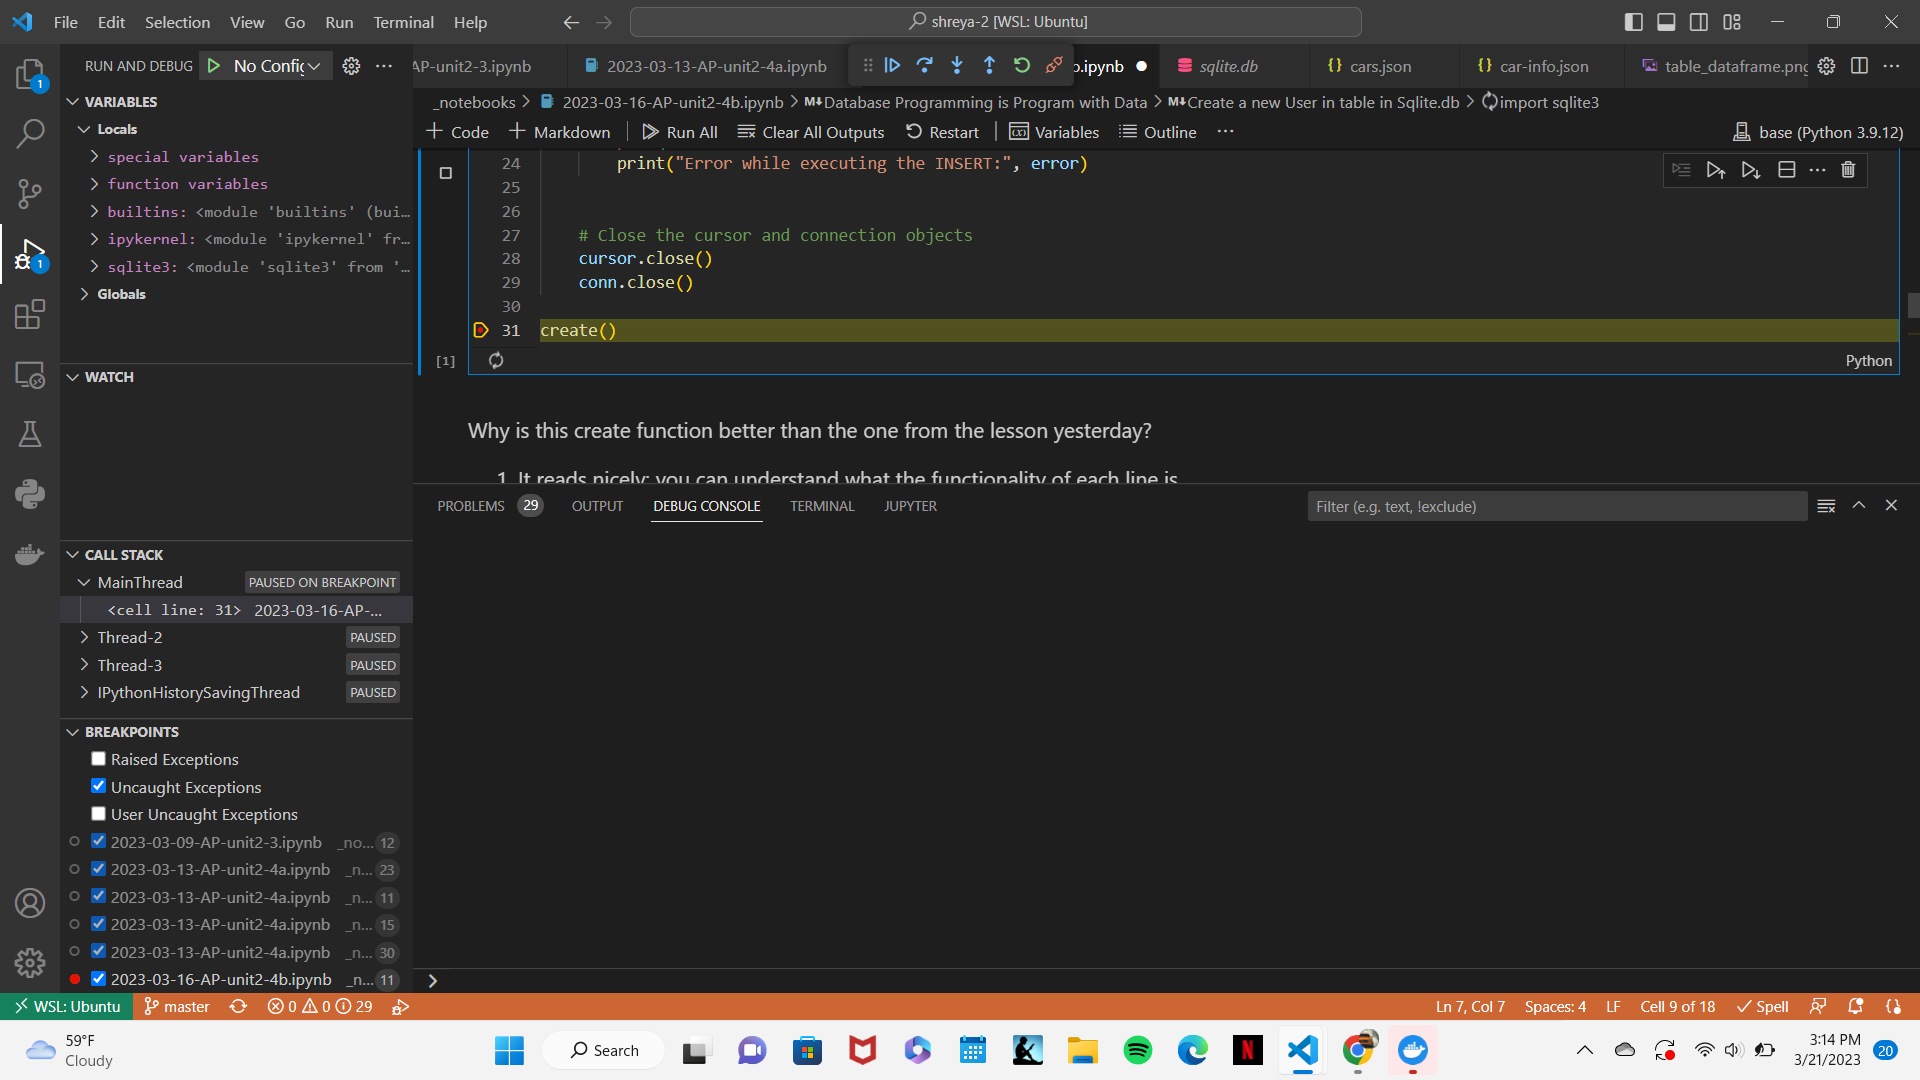

Why is this create function better than the one from the lesson yesterday?
1. It reads nicely; you can understand what the functionality of each line is 
2. Moves almost chronologically in order of what you need it to do, compared to yesterday's, which seems to jump around
3. Fewer try-excepts
4. Working directly through sqlite3
5. Shorter (procedural abstraction)
6. Less complicated (procedural abstraction)
7. Using objects --> makes it easier to understand

## Updating a User in table in Sqlite.db
> Uses SQL UPDATE to modify password
- What does the hacked part do?
    - the hacked part creates an error message if the user tries to enter a password that is less than two characters
- Explain try/except, when would except occur?
- What code seems to be repeated in each of these examples to point, why is it repeated?

In [ ]:
import sqlite3

def update():
    uid = input("Enter user id to update")
    password = input("Enter updated password")
    if len(password) < 2:
        message = "hacked"
        password = 'gothackednewpassword123'
    else:
        message = "successfully updated"

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()

    try:
        # Execute an SQL command to update data in a table
        cursor.execute("UPDATE users SET _password = ? WHERE _uid = ?", (password, uid))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            print(f"The row with user id {uid} the password has been {message}")
            conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the UPDATE:", error)
        
    
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#update()


## Delete a User in table in Sqlite.db
> Uses a delete function to remove a user based on a user input of the id.
- Is DELETE a dangerous operation?  Why?
- In the print statemements, what is the "f" and what does {uid} do?

In [ ]:
import sqlite3

def delete():
    uid = input("Enter user id to delete")

    # Connect to the database file
    conn = sqlite3.connect(database)

    # Create a cursor object to execute SQL commands
    cursor = conn.cursor()
    
    try:
        cursor.execute("DELETE FROM users WHERE _uid = ?", (uid,))
        if cursor.rowcount == 0:
            # The uid was not found in the table
            print(f"No uid {uid} was not found in the table")
        else:
            # The uid was found in the table and the row was deleted
            print(f"The row with uid {uid} was successfully deleted")
        conn.commit()
    except sqlite3.Error as error:
        print("Error while executing the DELETE:", error)
        
    # Close the cursor and connection objects
    cursor.close()
    conn.close()
    
#delete()

# Menu Interface to CRUD operations
> CRUD and Schema interactions from one location by running menu. Observe input at the top of VSCode, observe output underneath code cell.
- Why does the menu repeat?
- Could you refactor this menu?  Make it work with a List?

In [7]:
# Menu, to run other cells from one control point
def menu():
    operation = input("Enter: (C)reate (R)ead (U)pdate or (D)elete or (S)chema")
    if operation.lower() == 'c': # checks if input is C
        create()
    elif operation.lower() == 'r': # checks if input is R
        read()
    elif operation.lower() == 'u': # checks if input is U
        update()
    elif operation.lower() == 'd': # checks if input is D
        delete()
    elif operation.lower() == 's': # checks if input is S
        schema()
    elif len(operation)==0: # Escape Key # checks if input is the escape key
        return # if the input is escape key, then stop the function
    else:
        print("Please enter c, r, u, or d") # if the input is not the escape key, show this message and restart the function
    menu() # recursion, repeat menu; the function is calling itself
        
try:
    menu() # start menu
except:
    print("Perform Jupyter 'Run All' prior to starting menu")


(1, 'Thomas Edison', 'toby', 'sha256$zfnsqIPEAKoeZMf2$890504297f31e7a002c6d63fb520e6bf8b9ff5e53ead6fa095520d0da223fa2a', '1847-02-11')
(2, 'Nikola Tesla', 'niko', 'sha256$DhTSX1uSdNW12e66$5c56bd8cfac971f6208f4169fafc794b59eafa28eed29e858d2280bf67f4fb36', '2023-03-15')
(3, 'Alexander Graham Bell', 'lex', 'sha256$WYXdAAUsb9SqyRlQ$4968219d252cc37477dd467038cce4a1a26c22aad9d9d7374f75557b23e83495', '2023-03-15')
(4, 'Eli Whitney', 'whit', 'sha256$Hn4HMsO2553pYQLp$6085a296175563b2363eb4293a208698ca31e760a5e8a74394a35510817c15a0', '2023-03-15')
(5, 'Indiana Jones', 'indi', 'sha256$hU2hgumB7IAvIajn$7504fb225c6c87f6cb376f16b8389e4bc732a7422d50399be8d38ff164feb088', '1920-10-21')
(6, 'Marion Ravenwood', 'raven', 'sha256$3PtcQmsM9uih20Xg$a9111d8240ae3e1e7dc904f153b364cf7e294060425a6b279bddfd6c440c41f2', '1921-10-21')
(7, 'Shreya Sapkal', 'rey444', 'password', '2004-12-21')
(1, 'Thomas Edison', 'toby', 'sha256$zfnsqIPEAKoeZMf2$890504297f31e7a002c6d63fb520e6bf8b9ff5e53ead6fa095520d0da223fa2a', '184

`elif len(operation)==0: # Escape Key`
This says that keep prompting to type in C, R, U, or D until the escape key is pressed


# Hacks
- Add this Blog to you own Blogging site.  In the Blog add notes and observations on each code cell.
- In this implementation, do you see procedural abstraction?
- In 2.4a or 2.4b lecture
    - Do you see data abstraction?  Complement this with Debugging example.
    - Use Imperative or OOP style to Create a new Table or do something that applies to your CPT project.
    

Reference... [sqlite documentation](https://www.sqlitetutorial.net/sqlite-python/creating-tables/)
